# Programming Assignment 2
## Object Oriented Programming
Implementation of a Custom `Time` Class Using Constructors & Operator Overloading

“HEADER FILE”<br>
“Time.h”


In [ ]:
#ifndef TIME_H
#define TIME_H
#include <iostream>

#include <iomanip>
using namespace std;
class Time
{
private:
	int days;
	int hours;
	int minutes;
	int seconds;
public:
	Time() 
		:days(0),hours(0),minutes(0),seconds(0){}

	Time(int t)
	{
		if ( t > 0)
		{
			setDays(setHours(setMinutes(setSeconds(t))));
		}
		else 
		{
			//setDays(setHours(setMinutes(setSeconds(0))));
			seconds = 0;
			minutes = 0;
			hours = 0;
			days = 0;
		}
	}
	Time(int d, int h, int m, int s)
	{
		if ( d>0 && h>0 && m>0 && s>0)
		{
			setDays(d+setHours(h+setMinutes(m+setSeconds(s))));
		}
		else 
		{
			seconds = 0;
			minutes = 0;
			hours = 0;
			days = 0;
		}
	}
	// setters
	void setDays(int d)
	{
		if( d > 0 )
		{
			days = d;
		}
		else
		{
			days = 0;			
		}
	}
	int setHours(int h)
	{
		if ( h > 0)
		{
			if ( h < 24)
			{
				hours = h;
				return 0;
			}
			else 
			{
				hours = h % 24;
				int d = h / 24;
				return d;
			}
		}
		else
		{
			hours = 0;
			return 0;
		}
	}
	int setMinutes(int m)
	{
		if ( m > 0)
		{
			if ( m < 60)
			{
				minutes = m;
				return 0;
			}
			else 
			{
				minutes = m % 60;
				int h=m/60;
				return h;
			}
		}
		else
		{
			minutes = 0;
			return 0;
		}
	}
	int setSeconds(int s)
	{
		if ( s > 0)
		{
			if ( s < 60)
			{
				seconds = s;
				return 0;
			}
			else 
			{
				seconds = s % 60;
				int m = s/60;
				return m;
			}
		}
		else
		{
			seconds = 0;
			return 0;
		}
	}
	friend ostream &operator<<( ostream &output, const Time &T ) 
	{ 
         output <<T.days<<"~"<<setfill('0')<<setw(2)<<T.hours<<":"<<setfill('0')<<setw(2)<<T.minutes<<":"<<setfill('0')<<setw(2)<<T.seconds;
         return output;            
    }
	friend istream &operator>>( istream &input, Time &T ) 
	{
		int d,h,m,s;
		input >> d >> h >> m >> s;
		if ( d>0 && h>0 && m>0 && s>0)
		{
			T.setDays(d+T.setHours(h+T.setMinutes(m+T.setSeconds(s))));
		}
		else 
		{
			T.seconds = 0;
			T.minutes = 0;
			T.hours = 0;
			T.days = 0;
		}
		
		return input;
	}
	int secondCalculate()
	{
		int temp;
		temp = seconds;
		temp = temp + (minutes*60);
		temp = temp + (hours*60*60);
		temp = temp + (days*24*60*60);
		return temp;
	}
	Time operator+( const Time &time)
	{
		Time t;
		int d =this-> days + time.days;
		int h = this-> hours + time.hours;
		int m = this-> minutes + time.minutes;
		int s = this-> seconds + time.seconds;
		t.setDays(d+t.setHours(h+t.setMinutes(m+t.setSeconds(s))));
		return t;
	}
	Time operator-( const Time & time)
	{
		Time t;
		int d =this-> days - time.days;
		int h = this-> hours - time.hours;
		int m = this-> minutes - time.minutes;
		int s = this-> seconds - time.seconds;
		t.setDays(d+t.setHours(h+t.setMinutes(m+t.setSeconds(s))));
		return t;
	}
	Time operator*( const Time & time)
	{
		Time t;
		int d =this-> days * time.days;
		int h = this-> hours * time.hours;
		int m = this-> minutes * time.minutes;
		int s = this-> seconds * time.seconds;
		t.setDays(d+t.setHours(h+t.setMinutes(m+t.setSeconds(s))));
		return t;
	}
	Time operator*( const int & i)
	{
		Time t;
		int d =this-> days * i;
		int h = this-> hours * i;
		int m = this-> minutes * i;
		int s = this-> seconds * i;
		t.setDays(d+t.setHours(h+t.setMinutes(m+t.setSeconds(s))));
		return t;
	}
	Time operator++()
	{
		int tempTime;
		
		tempTime = this->secondCalculate();
		tempTime++;
		this->setDays(this->setHours(this->setMinutes(this->setSeconds(tempTime))));
		Time t(tempTime);
		return t;
	}
	Time operator--()
	{
		int tempTime;
		
		tempTime = this->secondCalculate();
		tempTime--;
		this->setDays(this->setHours(this->setMinutes(this->setSeconds(tempTime))));
		Time t(tempTime);
		return t;
	}
	Time operator++(int)
	{
		int tempTime,originalTime;
		tempTime = this->secondCalculate();
		originalTime=tempTime;
		tempTime++;
		this->setDays(this->setHours(this->setMinutes(this->setSeconds(tempTime))));
		Time t(originalTime);
		return t;
	}
	Time operator--(int)
	{
		int tempTime,originalTime;
		tempTime = this->secondCalculate();
		originalTime=tempTime;
		tempTime--;
		this->setDays(this->setHours(this->setMinutes(this->setSeconds(tempTime))));
		Time t(originalTime);
		return t;
	}
	bool operator < (const Time &t)
	{
		if ( this->days < t.days )
			return true;
		else if (this->days == t.days)
		{
			if (this->hours < t.hours)
				return true;
			else if ( this->hours == t.hours)
			{
				if ( this->minutes < t.minutes)
					return true;
				else if ( this->minutes == t.minutes)
				{
					if (this->seconds < t.seconds )
						return true;
					else
						return false;
				}
				else return false;
			}
			else return false;
		}
		else return false;
	}
	bool operator > (const Time &t)
	{
		if ( this->days > t.days )
			return true;
		else if (this->days == t.days)
		{
			if (this->hours > t.hours)
				return true;
			else if ( this->hours == t.hours)
			{
				if ( this->minutes > t.minutes)
					return true;
				else if ( this->minutes == t.minutes)
				{
					if (this->seconds > t.seconds )
						return true;
					else
						return false;
				}
				else return false;
			}
			else return false;
		}
		else return false;
	}
	bool operator == (const Time &t)
	{
		if ( this->days == t.days && this->hours == t.hours && this->minutes == t.minutes && this->seconds == t.seconds )
			return true;
		else
			return false;
	}
	bool operator != (const Time &t)
	{
		if ( this->days != t.days && this->hours != t.hours && this->minutes != t.minutes && this->seconds != t.seconds )
			return true;
		else
			return false;
	}
	void printTime()
	{
		cout<<days<<"~"<<setfill('0')<<setw(2)<<hours<<":"<<setfill('0')<<setw(2)<<minutes<<":"<<setfill('0')<<setw(2)<<seconds<<endl;
	}
};
#endif


“SOURCE FILE”<br>
“main.cpp”


#include <iostream>
#include "time.h"
using namespace std;
int main()
{
	
	Time t; // this creates an object which is 0 days, 0 hours, 0 minutes, 0 seconds
	Time s(1234); // this creates an object representing 0 days, 0 hours, 20 minutes, 34 seconds
	Time r(-123); // creates an object representing 0 days, 0 hours, 0 minutes, 0 seconds
	t = 4321; // conversion constructor allows this assignment.
	// t now stores 0 days, 1 hour, 12 minutes, 1 second
	Time x(1, 3, 5, 7); // 1 day, 3 hours, 5 minutes, 7 seconds
	Time y(2, -4, 6, 8); // creates object representing 0, since -4 hours not legal
	Time z(2, 25, 4, 62); // 3 days, 1 hour, 5 minutes, 2 seconds (simplified)
	cout<<" Time Clock . . . "<<'\n'<<'\n';
	cout<< "conversion constructor = ";
	t.printTime(); 
	cout<< "s = ";
	s.printTime();
	cout<< "r = ";
	r.printTime();
	cout<< "x = ";
	x.printTime();
	cout<< "y = ";
	y.printTime();
	cout<< "z = ";
	z.printTime();
	cout<<endl;

	Time out1(10,12,23,10); //example run insertion operator
	//10~12:23:48 means 10 days, 12 hours, 23 minutes, 48 seconds
	cout << "Insertion Operator Ex1 = " << out1 <<'\n';
	Time out2(123,04,02,33); ////example run insertion operator
	//123~04:02:33 means 123 days, 4 hours, 2 minutes, 33 seconds
	cout << "Insertion Operator Ex2 = " << out2 <<'\n';
	cout<<endl;

	cout<<" MAIN" <<endl;
	Time t1, t2, t3(123456), t4(4,22,58,01), t6(4,22,-58,01), t5(12224,22,58,01);
	t3.setSeconds(177600);
cout << "t1 = " << t1 << '\n'; //initialises the object to 0
cout << "t2 = " << t2 << '\n'; //initialises the object to 0
cout << "t3 = " << t3 << '\n'; // converts seconds to days,hours,minutes and seconds
cout << "t4 = " << t4 << '\n'; // sets time in simplified form
cout << "t5 = " << t5 << '\n'; // sets time in simplified form
cout << "t6 = " << t6 << '\n'; // makes object 0 due to illegal quantity
cout << "Enter first Time object (DAYS~HH:MM:SS): "<<endl;
cin >> t1;
cout<<"First time = "<<t1<<'\n';
cout << "Enter second Time object (DAYS~HH:MM:SS): "<<endl;
cin >> t2;
cout<<"Second time = "<<t2<<'\n';
cout << "\n\n";
cout <<" '+' Operator overloading (first time + second time) "<<endl;
cout << t1 << " + " << t2 << " = " << t1 + t2 << '\n\n'<<endl;
cout <<" '-' Operator overloading (first time - second time) "<<endl;
cout << t1 << " - " << t2 << " = " << t1 - t2 << "\n\n"<<endl;
cout <<" '*' Operator overloading (first time * second time) "<<endl;
cout << t1 << " * " << t2 << " = " << t1 * t2 << "\n\n"<<endl;
cout <<" '*' Operator multioverloading (first time * any integer value) "<<endl;
cout << t1 << " * 3 = " << t1 * 3 << '\n';
cout << t2 << " * 2 = " << t2 * 2 << '\n';
cout << t1 << " * 5 = " << t1 * 5 << '\n';
cout <<" comparison Operator overloading (first time & second time) "<<endl;
if (t1 < t2) cout << t1 << " < " << t2 << " is TRUE\n";
if (t1 > t2) cout << t1 << " > " << t2 << " is TRUE\n";
if (t1 == t2) cout << t1 << " == " << t2 << " is TRUE\n";
if (t1 != t2) cout << t1 << " != " << t2 << " is TRUE\n\n";

cout <<"Increments"<<endl;
cout << t1++<<endl;//prints t1 as it is because of post increment
cout << t1<<endl;//prints t1 incremented
cout << ++t1<<endl;// prints t1 incremented
cout << t1<<endl;//prints t1 same as in ++t1
cout <<"Decrements "<<endl;
cout << t2--<<endl;//prints t2 as it is because of post decrement
cout << t2<<endl;//prints t2 decremented
cout << --t2<<endl;// prints t2 decremented
cout << t2<<endl;//prints t2 same as in --t2


//cout << "t2++ = "<<t2++ << '\n';
return 0;
}


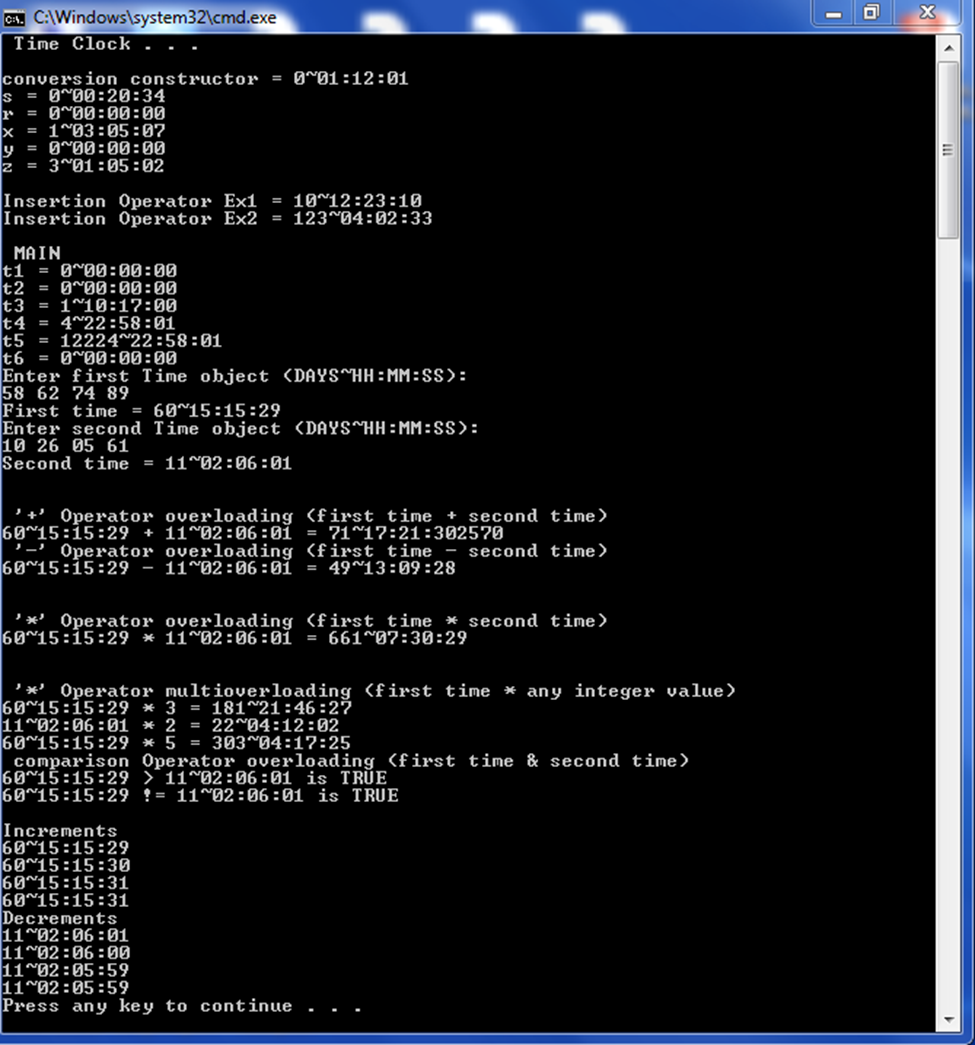